In [1]:
import torch
TORCH_VERSION = torch.__version__.split("+")[0]
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/$CUDA_VERSION/torch$TORCH_VERSION/index.html

# # Install mmdetection
# !rm -rf mmdetection
# !git clone https://github.com/open-mmlab/mmdetection.git
# %cd mmdetection

# !pip install -e .

# !pip install Pillow
# !pip uninstall pycocotools -y
# !pip install -q git+https://github.com/waleedka/coco.git#subdirectory=PythonAPI

torch:  1.12.1 ; cuda:  cu113


In [2]:
import json
from pycocotools.coco import COCO

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "/home/jovyan/fominaav/food-recognition/competition/data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "/home/jovyan/fominaav/food-recognition/competition/data/train/images/"

VAL_ANNOTATIONS_PATH = "/home/jovyan/fominaav/food-recognition/competition/data/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "/home/jovyan/fominaav/food-recognition/competition/data/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=6.26s)
creating index...
index created!


In [10]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
    train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
    val_annotations_data = json.load(f)
train_annotations_data['annotations'][0]

In [12]:
#fix dataset
import numpy as np
import pandas as pd
import cv2
import json
from tqdm.notebook import tqdm


# Function for taking a annotation & directiory of images and returning new annoation json with fixed image size info
def fix_data(annotations, directiory, VERBOSE = False):
    for n, i in enumerate(tqdm((annotations['images']))):
   
        img = cv2.imread(directiory+i["file_name"])

        if img.shape[0] != i['height']:
            annotations['images'][n]['height'] = img.shape[0]
            if VERBOSE:
                print(i["file_name"])
                print(annotations['images'][n], img.shape)

        if img.shape[1] != i['width']:
            annotations['images'][n]['width'] = img.shape[1]
            if VERBOSE:
                print(i["file_name"])
                print(annotations['images'][n], img.shape)

    return annotations

train_annotations_data = fix_data(train_annotations_data, TRAIN_IMAGE_DIRECTIORY)

with open('/home/jovyan/fominaav/food-recognition/competition/data/train/new_ann.json', 'w') as f:
    json.dump(train_annotations_data, f)

val_annotations_data = fix_data(val_annotations_data, VAL_IMAGE_DIRECTIORY)

with open('/home/jovyan/fominaav/food-recognition/competition/data/val/new_ann.json', 'w') as f:
    json.dump(val_annotations_data, f)

  0%|          | 0/54392 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

In [6]:
import numpy as np
import pandas as pd
import cv2
import json
from tqdm.notebook import tqdm
import os

## Model

In [7]:
# Explore classes to predict, we will use this while editing the config
annotation_path = os.path.join("/home/jovyan/fominaav/food-recognition/competition/data", "train/new_ann.json")
json_file = open(annotation_path)
coco = json.load(json_file)
# print(coco["categories"])
classes_names = [category["name"] for category in coco["categories"]]
# print(classes_names)

In [8]:
print(classes_names)

['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', '

In [9]:
len(classes_names)

323

In [40]:
from mmcv import Config

cfg = Config.fromfile('/home/jovyan/berkiu/instancesegmentation/mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py')
#cfg = Config.fromfile('/home/jovyan/berkiu/instancesegmentation/mmdetection/configs/htc/htc_x101_64x4d_fpn_16x1_20e_coco.py')

In [41]:
import sys
sys.path.append('/home/jovyan/berkiu/instancesegmentation/mmdetection/')
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'COCODataset'

cfg.data

cfg.data.test.ann_file = "/home/jovyan/fominaav/food-recognition/competition/data/val/new_ann.json"
cfg.data.test.img_prefix = "/home/jovyan/fominaav/food-recognition/competition/data/val/images/"
cfg.data.test.classes = ['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', 'soup_of_lentils_dahl_dhal', 'salmon', 'salt_cake_ch_vegetables_filled', 'orange', 'pasta_noodles', 'cream_double_cream_heavy_cream_45', 'cake_chocolate', 'pasta_spaghetti', 'black_olives', 'parmesan', 'spaetzle', 'salad_lambs_ear', 'salad_leaf_salad_green', 'potato', 'white_cabbage', 'halloumi', 'beetroot_raw', 'bread_grain', 'applesauce', 'cheese_for_raclette_ch', 'bread_white', 'curds_natural', 'quiche', 'beef_n_s', 'taboule_prepared_with_couscous', 'aubergine_eggplant', 'mozzarella', 'pasta_penne', 'lasagne_vegetable_prepared', 'mandarine', 'kiwi', 'french_beans', 'spring_roll_fried', 'caprese_salad_tomato_mozzarella', 'leaf_spinach', 'roll_of_half_white_or_white_flour_with_large_void', 'omelette_with_flour_thick_crepe_plain', 'tuna', 'dark_chocolate', 'sauce_savoury_n_s', 'raisins_dried', 'ice_tea_on_black_tea_basis', 'kaki', 'smoothie', 'crepe_with_flour_plain', 'nuggets', 'chili_con_carne_prepared', 'veggie_burger', 'chinese_cabbage', 'hamburger', 'soup_pumpkin', 'sushi', 'chestnuts_ch', 'sauce_soya', 'balsamic_salad_dressing', 'pasta_twist', 'bolognaise_sauce', 'leek', 'fajita_bread_only', 'potato_gnocchi', 'rice_noodles_vermicelli', 'bread_whole_wheat', 'onion', 'garlic', 'hummus', 'pizza_with_vegetables_baked', 'beer', 'glucose_drink_50g', 'ratatouille', 'peanut', 'cauliflower', 'green_olives', 'bread_pita', 'pasta_wholemeal', 'sauce_pesto', 'couscous', 'sauce', 'bread_toast', 'water_with_lemon_juice', 'espresso', 'egg_scrambled', 'juice_orange', 'braided_white_loaf_ch', 'emmental_cheese_ch', 'hazelnut_chocolate_spread_nutella_ovomaltine_caotina', 'tomme_ch', 'hazelnut', 'peach', 'figs', 'mashed_potatoes_prepared_with_full_fat_milk_with_butter', 'pumpkin', 'swiss_chard', 'red_cabbage_raw', 'spinach_raw', 'chicken_curry_cream_coconut_milk_curry_spices_paste', 'crunch_muesli', 'biscuit', 'meatloaf_ch', 'fresh_cheese_n_s', 'honey', 'vegetable_mix_peas_and_carrots', 'parsley', 'brownie', 'ice_cream_n_s', 'salad_dressing', 'dried_meat_n_s', 'chicken_breast', 'mixed_salad_chopped_without_sauce', 'feta', 'praline_n_s', 'walnut', 'potato_salad', 'kolhrabi', 'alfa_sprouts', 'brussel_sprouts', 'gruyere_ch', 'bulgur', 'grapes', 'chocolate_egg_small', 'cappuccino', 'crisp_bread', 'bread_black', 'rosti_n_s', 'mango', 'muesli_dry', 'spinach', 'fish_n_s', 'risotto', 'crisps_ch', 'pork_n_s', 'pomegranate', 'sweet_corn', 'flakes', 'greek_salad', 'sesame_seeds', 'bouillon', 'baked_potato', 'fennel', 'meat_n_s', 'croutons', 'bell_pepper_red_stewed', 'nuts', 'breadcrumbs_unspiced', 'fondue', 'sauce_mushroom', 'strawberries', 'pie_plum_baked_with_cake_dough', 'potatoes_au_gratin_dauphinois_prepared', 'capers', 'bread_wholemeal_toast', 'red_radish', 'fruit_tart', 'beans_kidney', 'sauerkraut', 'mustard', 'country_fries', 'ketchup', 'pasta_linguini_parpadelle_tagliatelle', 'chicken_cut_into_stripes_only_meat', 'cookies', 'sun_dried_tomatoe', 'bread_ticino_ch', 'semi_hard_cheese', 'porridge_prepared_with_partially_skimmed_milk', 'juice', 'chocolate_milk', 'bread_fruit', 'corn', 'dates', 'pistachio', 'cream_cheese_n_s', 'bread_rye', 'witloof_chicory', 'goat_cheese_soft', 'grapefruit_pomelo', 'blue_mould_cheese', 'guacamole', 'tofu', 'cordon_bleu', 'quinoa', 'kefir_drink', 'salad_rocket', 'pizza_with_ham_with_mushrooms_baked', 'fruit_coulis', 'plums', 'pizza_with_ham_baked', 'pineapple', 'seeds_n_s', 'focaccia', 'mixed_milk_beverage', 'coleslaw_chopped_without_sauce', 'sweet_potato', 'chicken_leg', 'croissant', 'cheesecake', 'sauce_cocktail', 'croissant_with_chocolate_filling', 'pumpkin_seeds', 'artichoke', 'soft_drink_with_a_taste', 'apple_pie', 'white_bread_with_butter_eggs_and_milk', 'savoury_pastry_stick', 'tuna_in_oil_drained', 'meat_terrine_pate', 'falafel_balls', 'berries_n_s', 'latte_macchiato', 'sugar_melon_galia_honeydew_cantaloupe', 'mixed_seeds_n_s', 'oil_vinegar_salad_dressing', 'celeriac', 'chocolate_mousse', 'lemon', 'chocolate_cookies', 'birchermuesli_prepared_no_sugar_added', 'muffin', 'pine_nuts', 'french_pizza_from_alsace_baked', 'chocolate_n_s', 'grits_polenta_maize_flour', 'wine_rose', 'cola_based_drink', 'raspberries', 'roll_with_pieces_of_chocolate', 'cake_lemon', 'rice_wild', 'gluten_free_bread', 'pearl_onion', 'tzatziki', 'ham_croissant_ch', 'corn_crisps', 'lentils_green_du_puy_du_berry', 'rice_whole_grain', 'cervelat_ch', 'aperitif_with_alcohol_n_s_aperol_spritz', 'peas', 'tiramisu', 'apricots', 'lasagne_meat_prepared', 'brioche', 'vegetable_au_gratin_baked', 'basil', 'butter_spread_puree_almond', 'pie_apricot', 'rusk_wholemeal', 'pasta_in_conch_form', 'pasta_in_butterfly_form_farfalle', 'damson_plum', 'shoots_n_s', 'coconut', 'banana_cake', 'sauce_curry', 'watermelon_fresh', 'white_asparagus', 'cherries', 'nectarine',]

cfg.data.train.ann_file = "/home/jovyan/fominaav/food-recognition/competition/data/train/new_ann.json"
cfg.data.train.img_prefix = "/home/jovyan/fominaav/food-recognition/competition/data/train/images/"
cfg.data.train.classes = ['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', 'soup_of_lentils_dahl_dhal', 'salmon', 'salt_cake_ch_vegetables_filled', 'orange', 'pasta_noodles', 'cream_double_cream_heavy_cream_45', 'cake_chocolate', 'pasta_spaghetti', 'black_olives', 'parmesan', 'spaetzle', 'salad_lambs_ear', 'salad_leaf_salad_green', 'potato', 'white_cabbage', 'halloumi', 'beetroot_raw', 'bread_grain', 'applesauce', 'cheese_for_raclette_ch', 'bread_white', 'curds_natural', 'quiche', 'beef_n_s', 'taboule_prepared_with_couscous', 'aubergine_eggplant', 'mozzarella', 'pasta_penne', 'lasagne_vegetable_prepared', 'mandarine', 'kiwi', 'french_beans', 'spring_roll_fried', 'caprese_salad_tomato_mozzarella', 'leaf_spinach', 'roll_of_half_white_or_white_flour_with_large_void', 'omelette_with_flour_thick_crepe_plain', 'tuna', 'dark_chocolate', 'sauce_savoury_n_s', 'raisins_dried', 'ice_tea_on_black_tea_basis', 'kaki', 'smoothie', 'crepe_with_flour_plain', 'nuggets', 'chili_con_carne_prepared', 'veggie_burger', 'chinese_cabbage', 'hamburger', 'soup_pumpkin', 'sushi', 'chestnuts_ch', 'sauce_soya', 'balsamic_salad_dressing', 'pasta_twist', 'bolognaise_sauce', 'leek', 'fajita_bread_only', 'potato_gnocchi', 'rice_noodles_vermicelli', 'bread_whole_wheat', 'onion', 'garlic', 'hummus', 'pizza_with_vegetables_baked', 'beer', 'glucose_drink_50g', 'ratatouille', 'peanut', 'cauliflower', 'green_olives', 'bread_pita', 'pasta_wholemeal', 'sauce_pesto', 'couscous', 'sauce', 'bread_toast', 'water_with_lemon_juice', 'espresso', 'egg_scrambled', 'juice_orange', 'braided_white_loaf_ch', 'emmental_cheese_ch', 'hazelnut_chocolate_spread_nutella_ovomaltine_caotina', 'tomme_ch', 'hazelnut', 'peach', 'figs', 'mashed_potatoes_prepared_with_full_fat_milk_with_butter', 'pumpkin', 'swiss_chard', 'red_cabbage_raw', 'spinach_raw', 'chicken_curry_cream_coconut_milk_curry_spices_paste', 'crunch_muesli', 'biscuit', 'meatloaf_ch', 'fresh_cheese_n_s', 'honey', 'vegetable_mix_peas_and_carrots', 'parsley', 'brownie', 'ice_cream_n_s', 'salad_dressing', 'dried_meat_n_s', 'chicken_breast', 'mixed_salad_chopped_without_sauce', 'feta', 'praline_n_s', 'walnut', 'potato_salad', 'kolhrabi', 'alfa_sprouts', 'brussel_sprouts', 'gruyere_ch', 'bulgur', 'grapes', 'chocolate_egg_small', 'cappuccino', 'crisp_bread', 'bread_black', 'rosti_n_s', 'mango', 'muesli_dry', 'spinach', 'fish_n_s', 'risotto', 'crisps_ch', 'pork_n_s', 'pomegranate', 'sweet_corn', 'flakes', 'greek_salad', 'sesame_seeds', 'bouillon', 'baked_potato', 'fennel', 'meat_n_s', 'croutons', 'bell_pepper_red_stewed', 'nuts', 'breadcrumbs_unspiced', 'fondue', 'sauce_mushroom', 'strawberries', 'pie_plum_baked_with_cake_dough', 'potatoes_au_gratin_dauphinois_prepared', 'capers', 'bread_wholemeal_toast', 'red_radish', 'fruit_tart', 'beans_kidney', 'sauerkraut', 'mustard', 'country_fries', 'ketchup', 'pasta_linguini_parpadelle_tagliatelle', 'chicken_cut_into_stripes_only_meat', 'cookies', 'sun_dried_tomatoe', 'bread_ticino_ch', 'semi_hard_cheese', 'porridge_prepared_with_partially_skimmed_milk', 'juice', 'chocolate_milk', 'bread_fruit', 'corn', 'dates', 'pistachio', 'cream_cheese_n_s', 'bread_rye', 'witloof_chicory', 'goat_cheese_soft', 'grapefruit_pomelo', 'blue_mould_cheese', 'guacamole', 'tofu', 'cordon_bleu', 'quinoa', 'kefir_drink', 'salad_rocket', 'pizza_with_ham_with_mushrooms_baked', 'fruit_coulis', 'plums', 'pizza_with_ham_baked', 'pineapple', 'seeds_n_s', 'focaccia', 'mixed_milk_beverage', 'coleslaw_chopped_without_sauce', 'sweet_potato', 'chicken_leg', 'croissant', 'cheesecake', 'sauce_cocktail', 'croissant_with_chocolate_filling', 'pumpkin_seeds', 'artichoke', 'soft_drink_with_a_taste', 'apple_pie', 'white_bread_with_butter_eggs_and_milk', 'savoury_pastry_stick', 'tuna_in_oil_drained', 'meat_terrine_pate', 'falafel_balls', 'berries_n_s', 'latte_macchiato', 'sugar_melon_galia_honeydew_cantaloupe', 'mixed_seeds_n_s', 'oil_vinegar_salad_dressing', 'celeriac', 'chocolate_mousse', 'lemon', 'chocolate_cookies', 'birchermuesli_prepared_no_sugar_added', 'muffin', 'pine_nuts', 'french_pizza_from_alsace_baked', 'chocolate_n_s', 'grits_polenta_maize_flour', 'wine_rose', 'cola_based_drink', 'raspberries', 'roll_with_pieces_of_chocolate', 'cake_lemon', 'rice_wild', 'gluten_free_bread', 'pearl_onion', 'tzatziki', 'ham_croissant_ch', 'corn_crisps', 'lentils_green_du_puy_du_berry', 'rice_whole_grain', 'cervelat_ch', 'aperitif_with_alcohol_n_s_aperol_spritz', 'peas', 'tiramisu', 'apricots', 'lasagne_meat_prepared', 'brioche', 'vegetable_au_gratin_baked', 'basil', 'butter_spread_puree_almond', 'pie_apricot', 'rusk_wholemeal', 'pasta_in_conch_form', 'pasta_in_butterfly_form_farfalle', 'damson_plum', 'shoots_n_s', 'coconut', 'banana_cake', 'sauce_curry', 'watermelon_fresh', 'white_asparagus', 'cherries', 'nectarine',]

cfg.data.val.ann_file = "/home/jovyan/fominaav/food-recognition/competition/data/val/new_ann.json"
cfg.data.val.img_prefix = "/home/jovyan/fominaav/food-recognition/competition/data/val/images/"
cfg.data.val.classes = ['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', 'soup_of_lentils_dahl_dhal', 'salmon', 'salt_cake_ch_vegetables_filled', 'orange', 'pasta_noodles', 'cream_double_cream_heavy_cream_45', 'cake_chocolate', 'pasta_spaghetti', 'black_olives', 'parmesan', 'spaetzle', 'salad_lambs_ear', 'salad_leaf_salad_green', 'potato', 'white_cabbage', 'halloumi', 'beetroot_raw', 'bread_grain', 'applesauce', 'cheese_for_raclette_ch', 'bread_white', 'curds_natural', 'quiche', 'beef_n_s', 'taboule_prepared_with_couscous', 'aubergine_eggplant', 'mozzarella', 'pasta_penne', 'lasagne_vegetable_prepared', 'mandarine', 'kiwi', 'french_beans', 'spring_roll_fried', 'caprese_salad_tomato_mozzarella', 'leaf_spinach', 'roll_of_half_white_or_white_flour_with_large_void', 'omelette_with_flour_thick_crepe_plain', 'tuna', 'dark_chocolate', 'sauce_savoury_n_s', 'raisins_dried', 'ice_tea_on_black_tea_basis', 'kaki', 'smoothie', 'crepe_with_flour_plain', 'nuggets', 'chili_con_carne_prepared', 'veggie_burger', 'chinese_cabbage', 'hamburger', 'soup_pumpkin', 'sushi', 'chestnuts_ch', 'sauce_soya', 'balsamic_salad_dressing', 'pasta_twist', 'bolognaise_sauce', 'leek', 'fajita_bread_only', 'potato_gnocchi', 'rice_noodles_vermicelli', 'bread_whole_wheat', 'onion', 'garlic', 'hummus', 'pizza_with_vegetables_baked', 'beer', 'glucose_drink_50g', 'ratatouille', 'peanut', 'cauliflower', 'green_olives', 'bread_pita', 'pasta_wholemeal', 'sauce_pesto', 'couscous', 'sauce', 'bread_toast', 'water_with_lemon_juice', 'espresso', 'egg_scrambled', 'juice_orange', 'braided_white_loaf_ch', 'emmental_cheese_ch', 'hazelnut_chocolate_spread_nutella_ovomaltine_caotina', 'tomme_ch', 'hazelnut', 'peach', 'figs', 'mashed_potatoes_prepared_with_full_fat_milk_with_butter', 'pumpkin', 'swiss_chard', 'red_cabbage_raw', 'spinach_raw', 'chicken_curry_cream_coconut_milk_curry_spices_paste', 'crunch_muesli', 'biscuit', 'meatloaf_ch', 'fresh_cheese_n_s', 'honey', 'vegetable_mix_peas_and_carrots', 'parsley', 'brownie', 'ice_cream_n_s', 'salad_dressing', 'dried_meat_n_s', 'chicken_breast', 'mixed_salad_chopped_without_sauce', 'feta', 'praline_n_s', 'walnut', 'potato_salad', 'kolhrabi', 'alfa_sprouts', 'brussel_sprouts', 'gruyere_ch', 'bulgur', 'grapes', 'chocolate_egg_small', 'cappuccino', 'crisp_bread', 'bread_black', 'rosti_n_s', 'mango', 'muesli_dry', 'spinach', 'fish_n_s', 'risotto', 'crisps_ch', 'pork_n_s', 'pomegranate', 'sweet_corn', 'flakes', 'greek_salad', 'sesame_seeds', 'bouillon', 'baked_potato', 'fennel', 'meat_n_s', 'croutons', 'bell_pepper_red_stewed', 'nuts', 'breadcrumbs_unspiced', 'fondue', 'sauce_mushroom', 'strawberries', 'pie_plum_baked_with_cake_dough', 'potatoes_au_gratin_dauphinois_prepared', 'capers', 'bread_wholemeal_toast', 'red_radish', 'fruit_tart', 'beans_kidney', 'sauerkraut', 'mustard', 'country_fries', 'ketchup', 'pasta_linguini_parpadelle_tagliatelle', 'chicken_cut_into_stripes_only_meat', 'cookies', 'sun_dried_tomatoe', 'bread_ticino_ch', 'semi_hard_cheese', 'porridge_prepared_with_partially_skimmed_milk', 'juice', 'chocolate_milk', 'bread_fruit', 'corn', 'dates', 'pistachio', 'cream_cheese_n_s', 'bread_rye', 'witloof_chicory', 'goat_cheese_soft', 'grapefruit_pomelo', 'blue_mould_cheese', 'guacamole', 'tofu', 'cordon_bleu', 'quinoa', 'kefir_drink', 'salad_rocket', 'pizza_with_ham_with_mushrooms_baked', 'fruit_coulis', 'plums', 'pizza_with_ham_baked', 'pineapple', 'seeds_n_s', 'focaccia', 'mixed_milk_beverage', 'coleslaw_chopped_without_sauce', 'sweet_potato', 'chicken_leg', 'croissant', 'cheesecake', 'sauce_cocktail', 'croissant_with_chocolate_filling', 'pumpkin_seeds', 'artichoke', 'soft_drink_with_a_taste', 'apple_pie', 'white_bread_with_butter_eggs_and_milk', 'savoury_pastry_stick', 'tuna_in_oil_drained', 'meat_terrine_pate', 'falafel_balls', 'berries_n_s', 'latte_macchiato', 'sugar_melon_galia_honeydew_cantaloupe', 'mixed_seeds_n_s', 'oil_vinegar_salad_dressing', 'celeriac', 'chocolate_mousse', 'lemon', 'chocolate_cookies', 'birchermuesli_prepared_no_sugar_added', 'muffin', 'pine_nuts', 'french_pizza_from_alsace_baked', 'chocolate_n_s', 'grits_polenta_maize_flour', 'wine_rose', 'cola_based_drink', 'raspberries', 'roll_with_pieces_of_chocolate', 'cake_lemon', 'rice_wild', 'gluten_free_bread', 'pearl_onion', 'tzatziki', 'ham_croissant_ch', 'corn_crisps', 'lentils_green_du_puy_du_berry', 'rice_whole_grain', 'cervelat_ch', 'aperitif_with_alcohol_n_s_aperol_spritz', 'peas', 'tiramisu', 'apricots', 'lasagne_meat_prepared', 'brioche', 'vegetable_au_gratin_baked', 'basil', 'butter_spread_puree_almond', 'pie_apricot', 'rusk_wholemeal', 'pasta_in_conch_form', 'pasta_in_butterfly_form_farfalle', 'damson_plum', 'shoots_n_s', 'coconut', 'banana_cake', 'sauce_curry', 'watermelon_fresh', 'white_asparagus', 'cherries', 'nectarine',]

# modify num classes of the model in box head and mask head
cfg.model.roi_head.bbox_head.num_classes = 323
cfg.model.roi_head.mask_head.num_classes = 323

# We can still the pre-trained Mask RCNN model to obtain a higher performance
#cfg.load_from = '/home/jovyan/berkiu/instancesegmentation/mmdetection/checkpoints/htc_x101_64x4d_fpn_16x1_20e_coco_20200318-b181fd7a.pth'
cfg.load_from = '/home/jovyan/berkiu/instancesegmentation/mmdetection/checkpoints/mask_rcnn_r50_fpn_3x_32bs_ins_seg_bdd100k.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps/train_1'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 1

cfg.data.samples_per_gpu = 16
cfg.data.workers_per_gpu = 8
cfg.runner.max_epochs = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

cfg.device = 'cuda'

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_wei

In [42]:
import mmcv
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)

device='cuda:0'
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES
model.to(device)

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=7.30s)
creating index...
index created!


2023-05-31 16:19:45,328 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-31 16:19:45,417 - mmdet - INFO - load checkpoint from local path: /home/jovyan/berkiu/instancesegmentation/mmdetection/checkpoints/mask_rcnn_r50_fpn_3x_32bs_ins_seg_bdd100k.pth


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


2023-05-31 16:19:45,587 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([9, 1024]) from checkpoint, the shape in current model is torch.Size([324, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([9]) from checkpoint, the shape in current model is torch.Size([324]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([32, 1024]) from checkpoint, the shape in current model is torch.Size([1292, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([1292]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([8, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([323, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logi

2023-05-31 16:22:21,518 - mmdet - INFO - Epoch [1][180/3401]	lr: 2.500e-03, eta: 9:46:20, time: 0.782, data_time: 0.110, memory: 24392, loss_rpn_cls: 0.0211, loss_rpn_bbox: 0.0178, loss_cls: 0.3971, acc: 95.0879, loss_bbox: 0.1983, loss_mask: 0.6905, loss: 1.3248
2023-05-31 16:22:29,430 - mmdet - INFO - Epoch [1][190/3401]	lr: 2.500e-03, eta: 9:43:31, time: 0.791, data_time: 0.113, memory: 24392, loss_rpn_cls: 0.0186, loss_rpn_bbox: 0.0168, loss_cls: 0.3880, acc: 95.1611, loss_bbox: 0.1919, loss_mask: 0.6861, loss: 1.3014
2023-05-31 16:22:37,290 - mmdet - INFO - Epoch [1][200/3401]	lr: 2.500e-03, eta: 9:40:48, time: 0.786, data_time: 0.093, memory: 24392, loss_rpn_cls: 0.0162, loss_rpn_bbox: 0.0144, loss_cls: 0.3555, acc: 95.5322, loss_bbox: 0.1771, loss_mask: 0.6870, loss: 1.2503
2023-05-31 16:22:45,193 - mmdet - INFO - Epoch [1][210/3401]	lr: 2.500e-03, eta: 9:38:29, time: 0.791, data_time: 0.135, memory: 24392, loss_rpn_cls: 0.0196, loss_rpn_bbox: 0.0145, loss_cls: 0.3582, acc: 95.5

2023-05-31 16:26:32,968 - mmdet - INFO - Epoch [1][500/3401]	lr: 2.500e-03, eta: 9:07:17, time: 0.788, data_time: 0.117, memory: 24392, loss_rpn_cls: 0.0194, loss_rpn_bbox: 0.0170, loss_cls: 0.3302, acc: 95.7739, loss_bbox: 0.1672, loss_mask: 0.6177, loss: 1.1514
2023-05-31 16:26:40,818 - mmdet - INFO - Epoch [1][510/3401]	lr: 2.500e-03, eta: 9:06:44, time: 0.783, data_time: 0.108, memory: 24392, loss_rpn_cls: 0.0211, loss_rpn_bbox: 0.0161, loss_cls: 0.3106, acc: 96.0486, loss_bbox: 0.1562, loss_mask: 0.6153, loss: 1.1193
2023-05-31 16:26:48,675 - mmdet - INFO - Epoch [1][520/3401]	lr: 2.500e-03, eta: 9:06:16, time: 0.787, data_time: 0.109, memory: 24392, loss_rpn_cls: 0.0184, loss_rpn_bbox: 0.0141, loss_cls: 0.2899, acc: 96.2561, loss_bbox: 0.1479, loss_mask: 0.6150, loss: 1.0852
2023-05-31 16:26:57,091 - mmdet - INFO - Epoch [1][530/3401]	lr: 2.500e-03, eta: 9:06:29, time: 0.842, data_time: 0.148, memory: 24392, loss_rpn_cls: 0.0151, loss_rpn_bbox: 0.0160, loss_cls: 0.3383, acc: 95.6

2023-05-31 16:30:46,474 - mmdet - INFO - Epoch [1][820/3401]	lr: 2.500e-03, eta: 8:57:07, time: 0.760, data_time: 0.104, memory: 24392, loss_rpn_cls: 0.0168, loss_rpn_bbox: 0.0150, loss_cls: 0.3112, acc: 95.7202, loss_bbox: 0.1647, loss_mask: 0.5682, loss: 1.0759
2023-05-31 16:30:54,114 - mmdet - INFO - Epoch [1][830/3401]	lr: 2.500e-03, eta: 8:56:39, time: 0.764, data_time: 0.108, memory: 24392, loss_rpn_cls: 0.0166, loss_rpn_bbox: 0.0141, loss_cls: 0.3111, acc: 95.8716, loss_bbox: 0.1587, loss_mask: 0.5806, loss: 1.0811
2023-05-31 16:31:02,231 - mmdet - INFO - Epoch [1][840/3401]	lr: 2.500e-03, eta: 8:56:33, time: 0.810, data_time: 0.101, memory: 24392, loss_rpn_cls: 0.0180, loss_rpn_bbox: 0.0153, loss_cls: 0.2962, acc: 96.1060, loss_bbox: 0.1507, loss_mask: 0.5495, loss: 1.0297
2023-05-31 16:31:10,560 - mmdet - INFO - Epoch [1][850/3401]	lr: 2.500e-03, eta: 8:56:39, time: 0.835, data_time: 0.150, memory: 24392, loss_rpn_cls: 0.0145, loss_rpn_bbox: 0.0149, loss_cls: 0.3385, acc: 95.5

2023-05-31 16:34:52,168 - mmdet - INFO - Epoch [1][1130/3401]	lr: 2.500e-03, eta: 8:50:33, time: 0.824, data_time: 0.138, memory: 24392, loss_rpn_cls: 0.0192, loss_rpn_bbox: 0.0161, loss_cls: 0.3432, acc: 95.3088, loss_bbox: 0.1809, loss_mask: 0.4868, loss: 1.0462
2023-05-31 16:34:59,986 - mmdet - INFO - Epoch [1][1140/3401]	lr: 2.500e-03, eta: 8:50:17, time: 0.782, data_time: 0.108, memory: 24392, loss_rpn_cls: 0.0172, loss_rpn_bbox: 0.0166, loss_cls: 0.3647, acc: 95.1111, loss_bbox: 0.1889, loss_mask: 0.4967, loss: 1.0841
2023-05-31 16:35:07,788 - mmdet - INFO - Epoch [1][1150/3401]	lr: 2.500e-03, eta: 8:50:02, time: 0.780, data_time: 0.115, memory: 24392, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0148, loss_cls: 0.3182, acc: 95.5762, loss_bbox: 0.1719, loss_mask: 0.5056, loss: 1.0250
2023-05-31 16:35:15,708 - mmdet - INFO - Epoch [1][1160/3401]	lr: 2.500e-03, eta: 8:49:50, time: 0.792, data_time: 0.114, memory: 24392, loss_rpn_cls: 0.0175, loss_rpn_bbox: 0.0160, loss_cls: 0.3471, acc: 

2023-05-31 16:38:57,292 - mmdet - INFO - Epoch [1][1440/3401]	lr: 2.500e-03, eta: 8:44:46, time: 0.817, data_time: 0.129, memory: 24392, loss_rpn_cls: 0.0150, loss_rpn_bbox: 0.0159, loss_cls: 0.3511, acc: 95.2417, loss_bbox: 0.1813, loss_mask: 0.4338, loss: 0.9972
2023-05-31 16:39:05,573 - mmdet - INFO - Epoch [1][1450/3401]	lr: 2.500e-03, eta: 8:44:46, time: 0.828, data_time: 0.133, memory: 24392, loss_rpn_cls: 0.0192, loss_rpn_bbox: 0.0172, loss_cls: 0.3431, acc: 95.2454, loss_bbox: 0.1801, loss_mask: 0.4402, loss: 0.9998
2023-05-31 16:39:13,560 - mmdet - INFO - Epoch [1][1460/3401]	lr: 2.500e-03, eta: 8:44:38, time: 0.799, data_time: 0.108, memory: 24392, loss_rpn_cls: 0.0199, loss_rpn_bbox: 0.0178, loss_cls: 0.3313, acc: 95.4675, loss_bbox: 0.1710, loss_mask: 0.4261, loss: 0.9661
2023-05-31 16:39:21,606 - mmdet - INFO - Epoch [1][1470/3401]	lr: 2.500e-03, eta: 8:44:31, time: 0.803, data_time: 0.110, memory: 24392, loss_rpn_cls: 0.0141, loss_rpn_bbox: 0.0177, loss_cls: 0.3429, acc: 

2023-05-31 16:43:03,120 - mmdet - INFO - Epoch [1][1750/3401]	lr: 2.500e-03, eta: 8:39:52, time: 0.804, data_time: 0.106, memory: 24392, loss_rpn_cls: 0.0156, loss_rpn_bbox: 0.0156, loss_cls: 0.3088, acc: 95.6299, loss_bbox: 0.1620, loss_mask: 0.4173, loss: 0.9192
2023-05-31 16:43:10,888 - mmdet - INFO - Epoch [1][1760/3401]	lr: 2.500e-03, eta: 8:39:39, time: 0.777, data_time: 0.093, memory: 24392, loss_rpn_cls: 0.0137, loss_rpn_bbox: 0.0130, loss_cls: 0.2909, acc: 95.9229, loss_bbox: 0.1492, loss_mask: 0.3937, loss: 0.8606
2023-05-31 16:43:19,034 - mmdet - INFO - Epoch [1][1770/3401]	lr: 2.500e-03, eta: 8:39:35, time: 0.815, data_time: 0.139, memory: 24392, loss_rpn_cls: 0.0172, loss_rpn_bbox: 0.0165, loss_cls: 0.3092, acc: 95.6030, loss_bbox: 0.1659, loss_mask: 0.3941, loss: 0.9028
2023-05-31 16:43:27,093 - mmdet - INFO - Epoch [1][1780/3401]	lr: 2.500e-03, eta: 8:39:28, time: 0.806, data_time: 0.113, memory: 24392, loss_rpn_cls: 0.0135, loss_rpn_bbox: 0.0143, loss_cls: 0.3334, acc: 

2023-05-31 16:47:09,573 - mmdet - INFO - Epoch [1][2060/3401]	lr: 2.500e-03, eta: 8:35:23, time: 0.791, data_time: 0.114, memory: 24392, loss_rpn_cls: 0.0128, loss_rpn_bbox: 0.0131, loss_cls: 0.3130, acc: 95.6677, loss_bbox: 0.1622, loss_mask: 0.4041, loss: 0.9052
2023-05-31 16:47:17,619 - mmdet - INFO - Epoch [1][2070/3401]	lr: 2.500e-03, eta: 8:35:17, time: 0.806, data_time: 0.109, memory: 24392, loss_rpn_cls: 0.0133, loss_rpn_bbox: 0.0145, loss_cls: 0.3368, acc: 95.2820, loss_bbox: 0.1773, loss_mask: 0.4248, loss: 0.9667
2023-05-31 16:47:25,747 - mmdet - INFO - Epoch [1][2080/3401]	lr: 2.500e-03, eta: 8:35:11, time: 0.811, data_time: 0.107, memory: 24392, loss_rpn_cls: 0.0193, loss_rpn_bbox: 0.0159, loss_cls: 0.3221, acc: 95.4211, loss_bbox: 0.1694, loss_mask: 0.3941, loss: 0.9208
2023-05-31 16:47:33,582 - mmdet - INFO - Epoch [1][2090/3401]	lr: 2.500e-03, eta: 8:35:01, time: 0.785, data_time: 0.116, memory: 24392, loss_rpn_cls: 0.0140, loss_rpn_bbox: 0.0130, loss_cls: 0.2874, acc: 

2023-05-31 16:51:17,191 - mmdet - INFO - Epoch [1][2370/3401]	lr: 2.500e-03, eta: 8:31:20, time: 0.816, data_time: 0.123, memory: 24392, loss_rpn_cls: 0.0131, loss_rpn_bbox: 0.0135, loss_cls: 0.3152, acc: 95.3943, loss_bbox: 0.1686, loss_mask: 0.3778, loss: 0.8881
2023-05-31 16:51:24,986 - mmdet - INFO - Epoch [1][2380/3401]	lr: 2.500e-03, eta: 8:31:09, time: 0.780, data_time: 0.113, memory: 24392, loss_rpn_cls: 0.0127, loss_rpn_bbox: 0.0129, loss_cls: 0.2802, acc: 95.8191, loss_bbox: 0.1503, loss_mask: 0.3767, loss: 0.8327
2023-05-31 16:51:32,721 - mmdet - INFO - Epoch [1][2390/3401]	lr: 2.500e-03, eta: 8:30:57, time: 0.774, data_time: 0.099, memory: 24392, loss_rpn_cls: 0.0111, loss_rpn_bbox: 0.0146, loss_cls: 0.3287, acc: 95.3528, loss_bbox: 0.1723, loss_mask: 0.3715, loss: 0.8981
2023-05-31 16:51:40,905 - mmdet - INFO - Epoch [1][2400/3401]	lr: 2.500e-03, eta: 8:30:53, time: 0.818, data_time: 0.108, memory: 24392, loss_rpn_cls: 0.0133, loss_rpn_bbox: 0.0134, loss_cls: 0.3168, acc: 

2023-05-31 16:55:21,769 - mmdet - INFO - Epoch [1][2680/3401]	lr: 2.500e-03, eta: 8:26:32, time: 0.751, data_time: 0.098, memory: 24392, loss_rpn_cls: 0.0134, loss_rpn_bbox: 0.0123, loss_cls: 0.3152, acc: 95.4651, loss_bbox: 0.1635, loss_mask: 0.3592, loss: 0.8636
2023-05-31 16:55:29,959 - mmdet - INFO - Epoch [1][2690/3401]	lr: 2.500e-03, eta: 8:26:27, time: 0.816, data_time: 0.119, memory: 24392, loss_rpn_cls: 0.0147, loss_rpn_bbox: 0.0137, loss_cls: 0.3066, acc: 95.4980, loss_bbox: 0.1645, loss_mask: 0.3805, loss: 0.8801
2023-05-31 16:55:37,886 - mmdet - INFO - Epoch [1][2700/3401]	lr: 2.500e-03, eta: 8:26:19, time: 0.796, data_time: 0.116, memory: 24392, loss_rpn_cls: 0.0148, loss_rpn_bbox: 0.0154, loss_cls: 0.3344, acc: 95.2063, loss_bbox: 0.1768, loss_mask: 0.3792, loss: 0.9205
2023-05-31 16:55:45,564 - mmdet - INFO - Epoch [1][2710/3401]	lr: 2.500e-03, eta: 8:26:07, time: 0.768, data_time: 0.106, memory: 24392, loss_rpn_cls: 0.0165, loss_rpn_bbox: 0.0130, loss_cls: 0.3082, acc: 

2023-05-31 16:59:30,189 - mmdet - INFO - Epoch [1][2990/3401]	lr: 2.500e-03, eta: 8:22:42, time: 0.791, data_time: 0.111, memory: 24392, loss_rpn_cls: 0.0133, loss_rpn_bbox: 0.0123, loss_cls: 0.3103, acc: 95.4431, loss_bbox: 0.1653, loss_mask: 0.3790, loss: 0.8802
2023-05-31 16:59:37,999 - mmdet - INFO - Epoch [1][3000/3401]	lr: 2.500e-03, eta: 8:22:32, time: 0.781, data_time: 0.112, memory: 24392, loss_rpn_cls: 0.0116, loss_rpn_bbox: 0.0136, loss_cls: 0.3324, acc: 95.0134, loss_bbox: 0.1798, loss_mask: 0.3696, loss: 0.9070
2023-05-31 16:59:45,888 - mmdet - INFO - Epoch [1][3010/3401]	lr: 2.500e-03, eta: 8:22:23, time: 0.788, data_time: 0.118, memory: 24392, loss_rpn_cls: 0.0123, loss_rpn_bbox: 0.0147, loss_cls: 0.3101, acc: 95.3979, loss_bbox: 0.1656, loss_mask: 0.3607, loss: 0.8634
2023-05-31 16:59:54,106 - mmdet - INFO - Epoch [1][3020/3401]	lr: 2.500e-03, eta: 8:22:18, time: 0.822, data_time: 0.122, memory: 24392, loss_rpn_cls: 0.0149, loss_rpn_bbox: 0.0146, loss_cls: 0.3148, acc: 

2023-05-31 17:03:36,662 - mmdet - INFO - Epoch [1][3300/3401]	lr: 2.500e-03, eta: 8:18:26, time: 0.797, data_time: 0.126, memory: 24392, loss_rpn_cls: 0.0121, loss_rpn_bbox: 0.0129, loss_cls: 0.2651, acc: 95.9827, loss_bbox: 0.1423, loss_mask: 0.3431, loss: 0.7756
2023-05-31 17:03:44,733 - mmdet - INFO - Epoch [1][3310/3401]	lr: 2.500e-03, eta: 8:18:19, time: 0.805, data_time: 0.099, memory: 24392, loss_rpn_cls: 0.0147, loss_rpn_bbox: 0.0152, loss_cls: 0.3426, acc: 95.0488, loss_bbox: 0.1805, loss_mask: 0.3648, loss: 0.9177
2023-05-31 17:03:52,449 - mmdet - INFO - Epoch [1][3320/3401]	lr: 2.500e-03, eta: 8:18:09, time: 0.773, data_time: 0.100, memory: 24392, loss_rpn_cls: 0.0161, loss_rpn_bbox: 0.0158, loss_cls: 0.3452, acc: 95.0940, loss_bbox: 0.1785, loss_mask: 0.3345, loss: 0.8901
2023-05-31 17:04:00,385 - mmdet - INFO - Epoch [1][3330/3401]	lr: 2.500e-03, eta: 8:18:00, time: 0.794, data_time: 0.115, memory: 24392, loss_rpn_cls: 0.0140, loss_rpn_bbox: 0.0154, loss_cls: 0.3190, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 946/946, 15.6 task/s, elapsed: 61s, ETA:     0s

2023-05-31 17:05:59,896 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [43]:
checkpoint_file = "/home/jovyan/fominaav/food-recognition/competition/tutorial_exps/train_1/epoch_1.pth"
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

'/home/jovyan/fominaav/food-recognition/competition/tutorial_exps/train_1/epoch_1.pth'

load checkpoint from local path: /home/jovyan/fominaav/food-recognition/competition/tutorial_exps/train_1/epoch_1.pth


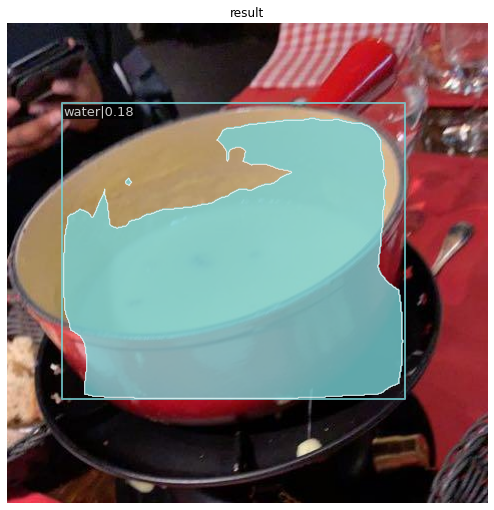

In [46]:
#Lets visualize some results
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab

def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result_pyplot, init_detector


score_thr = 0.1 #decrease the threshold if you feel like you are missing some predictions


# build the model from a config file and a checkpoint file
model = init_detector(cfg, checkpoint_file)

# test a single image and show the results
img = '/home/jovyan/fominaav/food-recognition/competition/data/val/images/008082.jpg'   #you can change this to any image you want!

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.1, title='result', wait_time=0)

In [51]:
import json, os
annotation_path = "/home/jovyan/fominaav/food-recognition/competition/data/train/new_ann.json"
json_file = open(annotation_path)
coco = json.load(json_file)

with open("classes.json",'w') as f:
    json.dump(coco["categories"],f)

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/user/conda/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/home/user/conda/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/user/conda/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user/conda/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/user/conda/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/user/conda/lib/python3.7/multiprocessing/queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times



In [62]:
test_images_dir="/home/jovyan/fominaav/food-recognition/competition/data/test/images/"
output_filepath="./predictions_mmdetection.json"
val_images_dir="/home/jovyan/fominaav/food-recognition/competition/data/val/images/"
val_output_filepath="./val_predictions_mmdetection.json"

#path of trained model & config
model_path="/home/jovyan/fominaav/food-recognition/competition/tutorial_exps/train_1/epoch_1.pth"
config_file='/home/jovyan/berkiu/instancesegmentation/mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py'

In [81]:
!python inference_mmdet.py --config $config_file --checkpoint $model_path \
--data $test_images_dir \
--format-only --eval-options "jsonfile_prefix=preds" --out_file $output_filepath \
--gpu-collect

/home/jovyan/.imgenv-berkut-1-gpu-0/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!

CocoDataset Test dataset with number of images 2819, and instance counts: 
+---------------------------------------------------------------+-------+---------------------------------------------------------+-------+---------------------------------------------+-------+----------------------------------------------+-------+-----------------------------------------------------+-------+
| category               

load checkpoint from local path: /home/jovyan/fominaav/food-recognition/competition/tutorial_exps/train_1/epoch_1.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 2819/2819, 18.4 task/s, elapsed: 153s, ETA:     0s
AICrowd register complete


In [73]:
!python inference_mmdet.py --config $config_file --checkpoint $model_path \
--data $val_images_dir \
--format-only --eval-options "jsonfile_prefix=preds" --out_file $val_output_filepath \
--gpu-collect

/home/jovyan/.imgenv-berkut-1-gpu-0/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

CocoDataset Test dataset with number of images 946, and instance counts: 
+---------------------------------------------------------------+-------+---------------------------------------------------------+-------+---------------------------------------------+-------+----------------------------------------------+-------+-----------------------------------------------------+-------+
| category                

load checkpoint from local path: /home/jovyan/fominaav/food-recognition/competition/tutorial_exps/train_1/epoch_1.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 946/946, 17.7 task/s, elapsed: 53s, ETA:     0s
AICrowd register complete


In [74]:
from pycocotools.coco import COCO
from cocoeval import COCOeval #требуется файлик cocoeval.py
import json

In [75]:
ground_truth_annotations = COCO('/home/jovyan/fominaav/food-recognition/competition/data/val/new_ann.json')

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [76]:
submission_file = json.loads(open("val_predictions_mmdetection.json").read())

In [77]:
results = ground_truth_annotations.loadRes(submission_file)

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


In [78]:
cocoEval = COCOeval(ground_truth_annotations, results, 'bbox')

In [79]:
cocoEval.evaluate()
cocoEval.accumulate()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=7.66s).
Accumulating evaluation results...
DONE (t=2.25s).


In [80]:
average_precision = cocoEval._summarize(ap=1, iouThr=0.5, areaRng="all", maxDets=100)
average_recall = cocoEval._summarize(ap=0, iouThr=0.5, areaRng="all", maxDets=100)
print("Average Precision : {} || Average Recall : {}".format(average_precision, average_recall))

 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.005
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.017
Average Precision : 0.0050550272875455595 || Average Recall : 0.01665401156428204
